In [1]:
import numpy as np
import sklearn as sk
import sklearn.preprocessing as pr
import sklearn.manifold as mani
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline


In [751]:
class Data:
    
    def __init__(self,X,y):
        if type(X) is type(pd.DataFrame()):
            self.df_X = X
            self.df_y = y
            self.keys= X.keys()
            self.df = True
        else:
            self.df = False
        self.scaled  = False
        self.X=np.asarray(X)
        self.y=np.asarray(y).reshape(len(y),)
        self.shape =  X.shape,y.shape

    def get_train_test(ratio= 0.2):
        x_tr,x_t,y_tr,y_t = train_test_split(X,y,test_size = ratio)
        return (x_tr,y_tr),(x_t,y_t)
    
    def log_x(self,fechs = [0,1,3,4,6,8,9,10,11]):
        X_lg = []
        loged  = Data(self.X,self.y)
        X = self.X
        for i in fechs:
            X_lg.append(np.log(X[:,i]+1))
        X_lg = np.asarray(X_lg)
        loged.X = X_lg.T
        loged.df = False
        loged.loged = True
        return loged
    
    def shuffle():
        Xs,ys=sk.utils.shuffle(X,y)
        self.X = Xs
        self.y = ys
        
    def scale(self):
        if (self.scaled):
            print 'Already scaled'
        else:
            scaler = pr.StandardScaler()
            X =  self.X
            scaler.fit(X)
            self.scaler = scaler
            tr = scaler.transform(X)
            self.orig_X = X
            self.X = tr
            self.scaled = True
            self.df = False
            return tr
    
    def describe(self):
        if self.df:
            return self.df_X.describe()
        else:
            return pd.DataFrame(self.X).describe()
        
    def plot_hist(self,num=0):
        w = self.X[:,num]
        plt.hist(w[self.y==0], bins=bins, alpha=0.65, label='notRet')
        plt.hist(w[self.y==1], bins=bins, alpha=0.65, label='ret')
        plt.legend(loc='upper right')
        try:
            print 'plot for', self.keys[num]
        except:
            print ""
    def plot_scatter(self,a=0,b=1,alpha= 0.5):
        x= self.X[:,a]
        y = self.X[:,b]
        plt.scatter(x,y,s=5,c=self.y,cmap='RdYlGn',alpha=alpha,edgecolors='face')
        
        
    def pairplot(self,l = 0,kws={"s": 7}):
        if(self.df):
            if(l==0):
                l= self.df_X.shape()[0]
            pair = pd.DataFrame(self.df_X[:l])
            pair['labels'] = self.df_y[:l]
            seaborn.pairplot(pair[:l], hue = 'labels',plot_kws=kws)
        else:
            if(l==0):
                l= self.X.shape()[0]
            pair = pd.DataFrame(self.X[:l])
            pair['labels'] = self.y[:l]
            seaborn.pairplot(pair[:l], hue = 'labels',plot_kws=kws)

x_train = pd.read_csv('x_train.csv',sep=';')
y_train = pd.read_csv('y_train.csv',sep=';',names=['value'])

data = Data(x_train,y_train)
data.scale()
print data.shape

((25289, 12), (25289, 1))


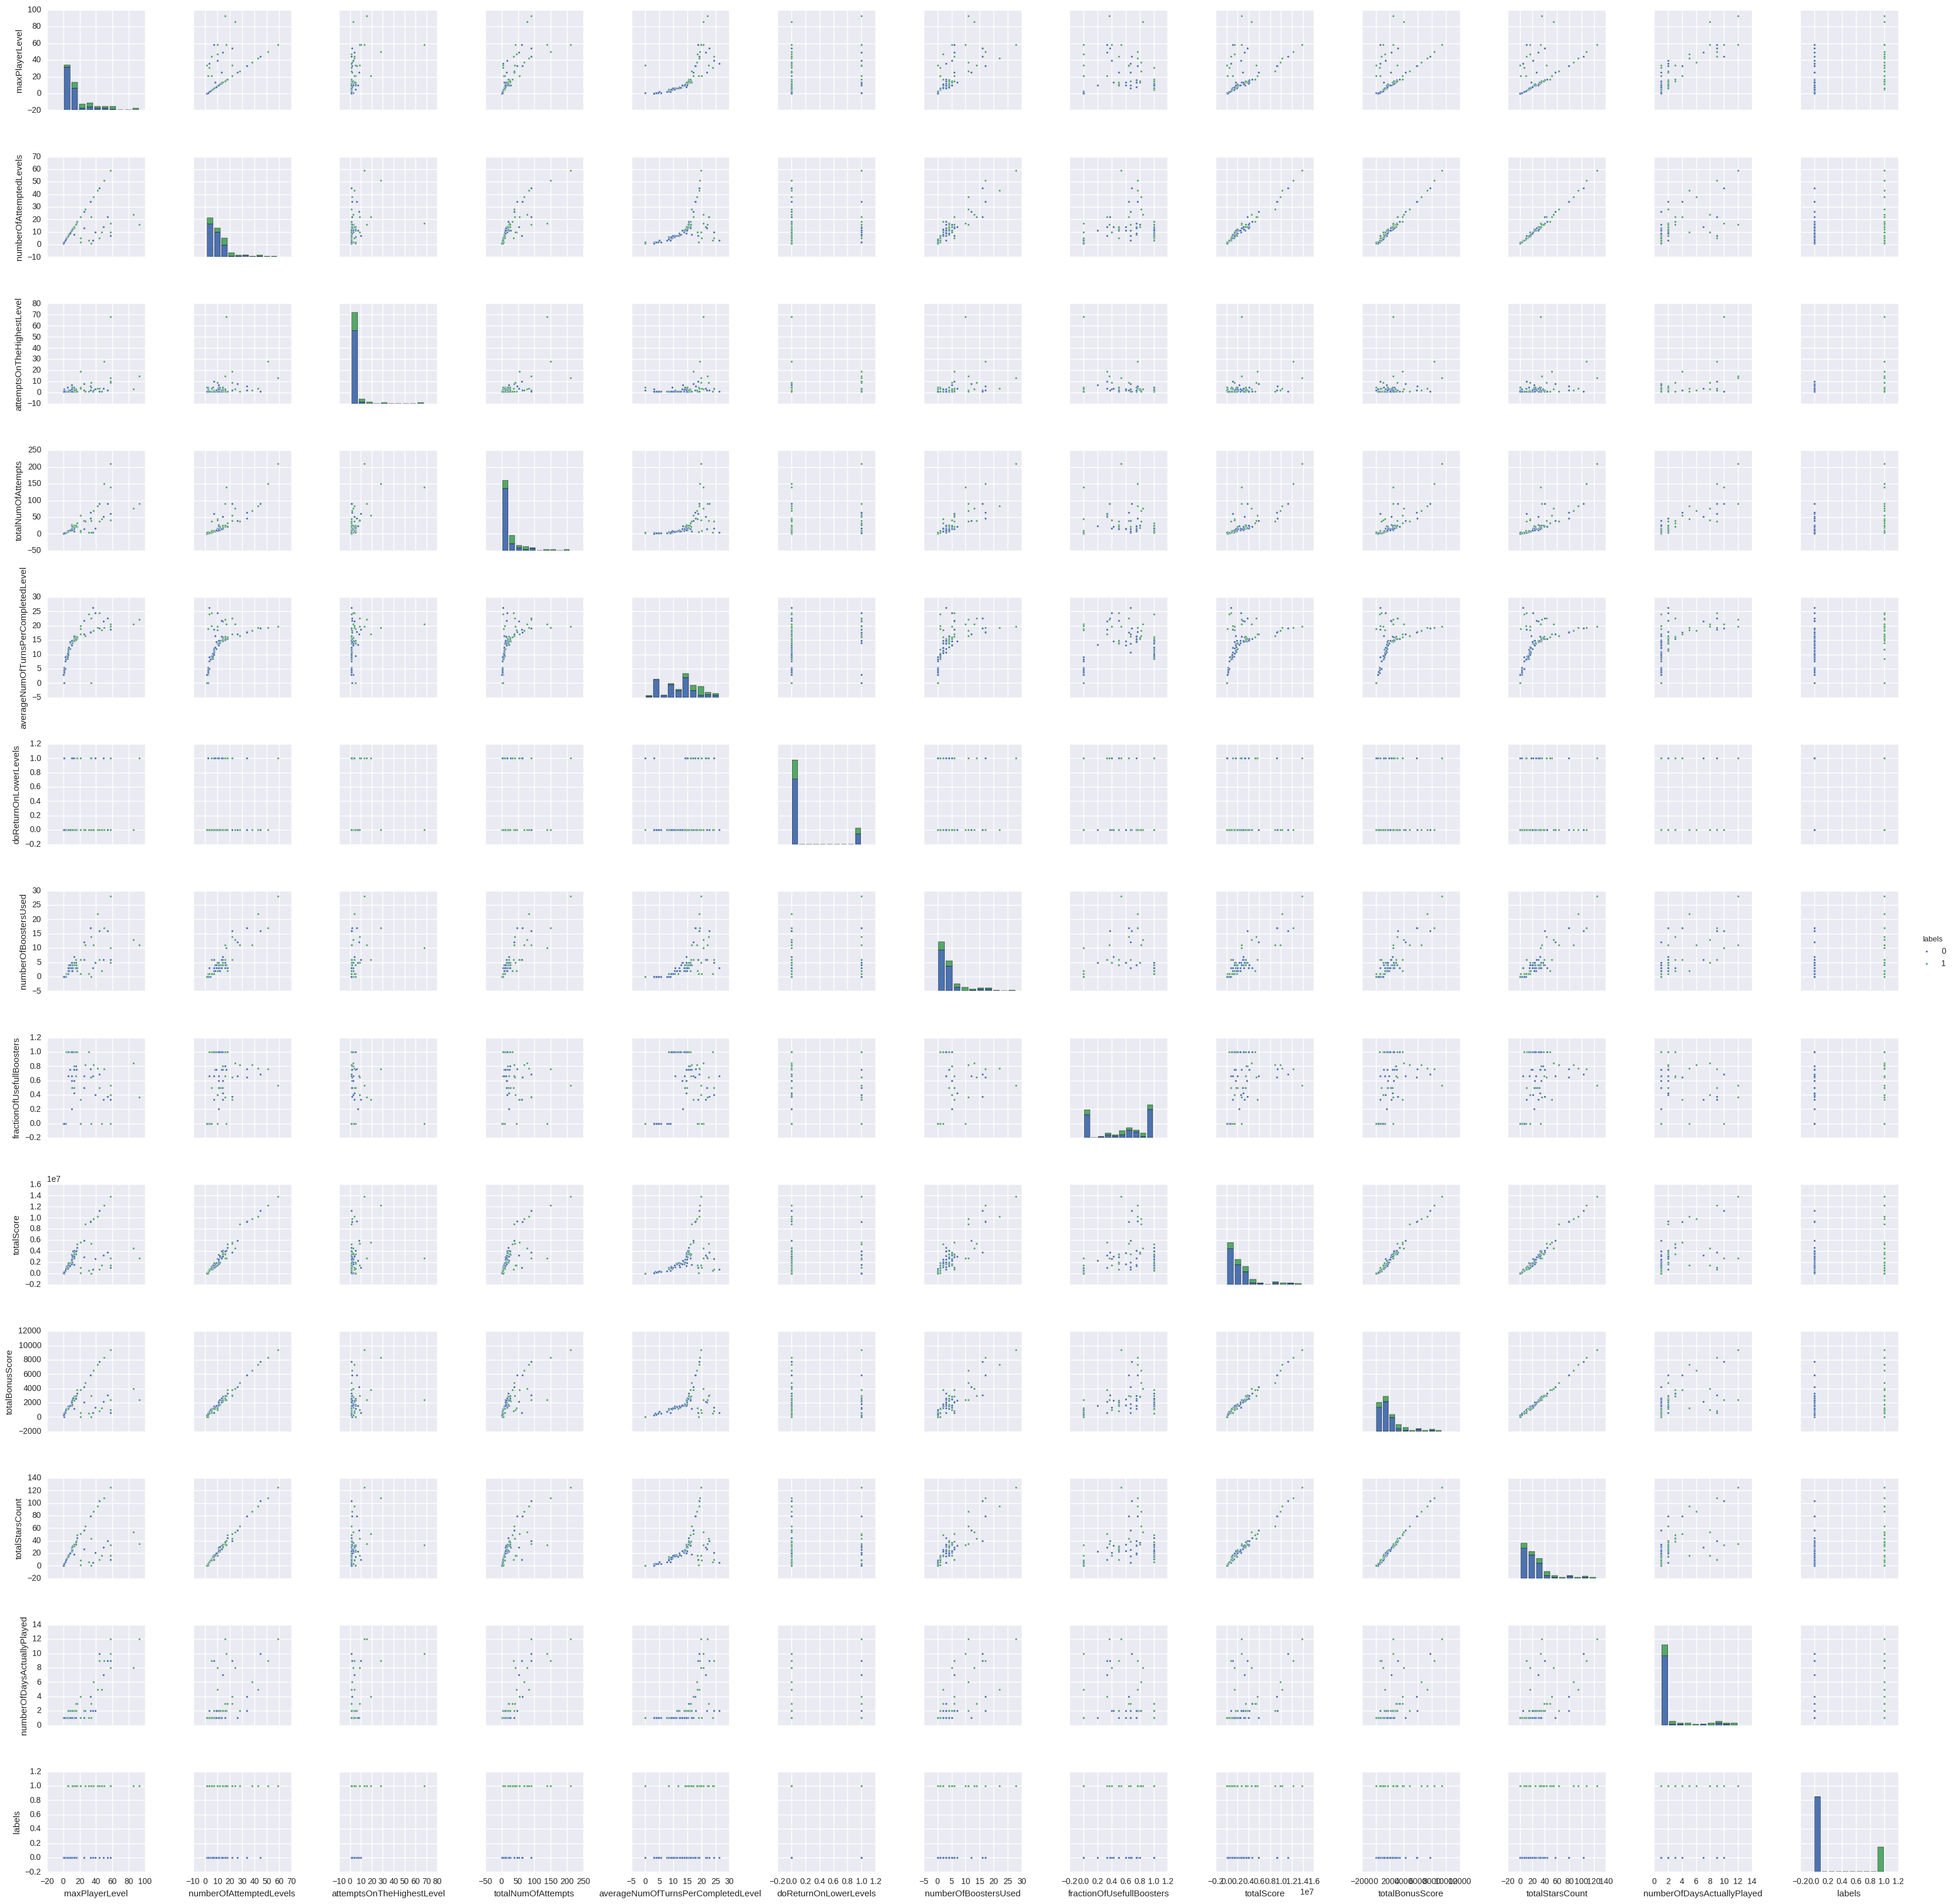

In [673]:
data.pairplot(100)

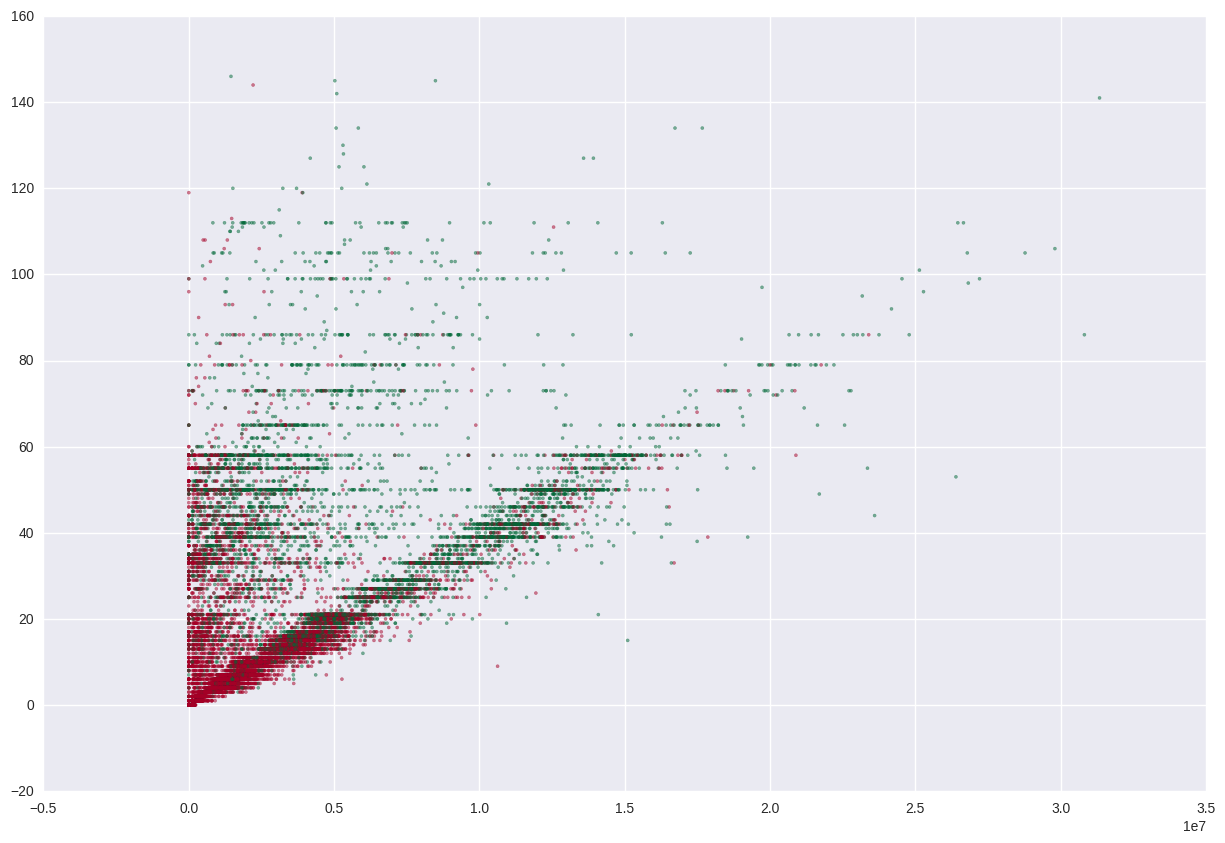

In [365]:
plt.figure(figsize=(15,10)) 
plt.scatter(x_train['totalScore'],x_train['maxPlayerLevel'],s=5,c=y_train,cmap='RdYlGn',alpha=0.5,edgecolors='face')

0 -0.251730530884 0.621761976736 1.95444568038
1 -0.251730530884 0.621761976736 1.3133302198
2 -0.251730530884 0.621761976736 1.8743455304
3 -0.251730530884 0.621761976736 1.12467405133
4 -0.251730530884 0.621761976736 1.54210250656
5 -0.251730530884 0.621761976736 0.600991832123
6 -0.251730530884 0.621761976736 0.663880189913
7 -0.251730530884 0.621761976736 1.14177526949
0.594125534733


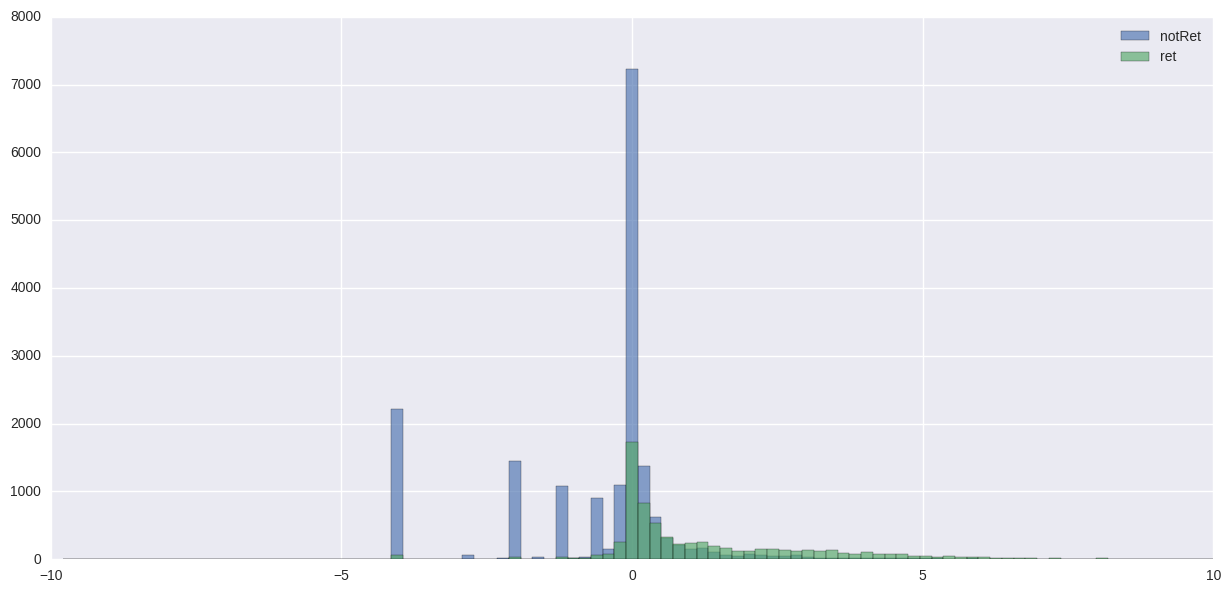

In [621]:
plt.figure(figsize=(15,7)) 
y=np.asarray(y_train).reshape(25289,)
#a=plt.hist(w,bins=30)
def cry(x):
    f = np.asarray(x[y==0])
    tr = np.asarray(x[y==1])
    a= f.mean()
    b= tr.mean()
    val  =abs(a-b)/np.std(tr)/np.std(f)
    return val

res=[]
for i in range(8):
    val  =cry(x[i])
    res.append(val)
    print i,a,b,val
    
i = np.argmax(res)
bins = np.linspace(-10, 10, 100)
w = x[0]*x[4]*x[1]
print cry(w)
lg =np.log(w+1)
plt.hist(w[y==0], bins=bins, alpha=0.65, label='notRet')
plt.hist(w[y==1], bins=bins, alpha=0.65, label='ret')
plt.legend(loc='upper right')
#pyplot.show()
    

In [622]:
x_new = pd.DataFrame()
for i in [0,1,3,4,6,8,9,10,11]:
    x_new[fnm[i]+'_log'] = np.log(x_train[fnm[i]]+1)
x_new[fnm[7]]=x_train[fnm[7]]
#x_new.describe()

In [691]:
data_log  = data
data_log.loged()
data_log.scale()

AttributeError: Data instance has no attribute 'loged'

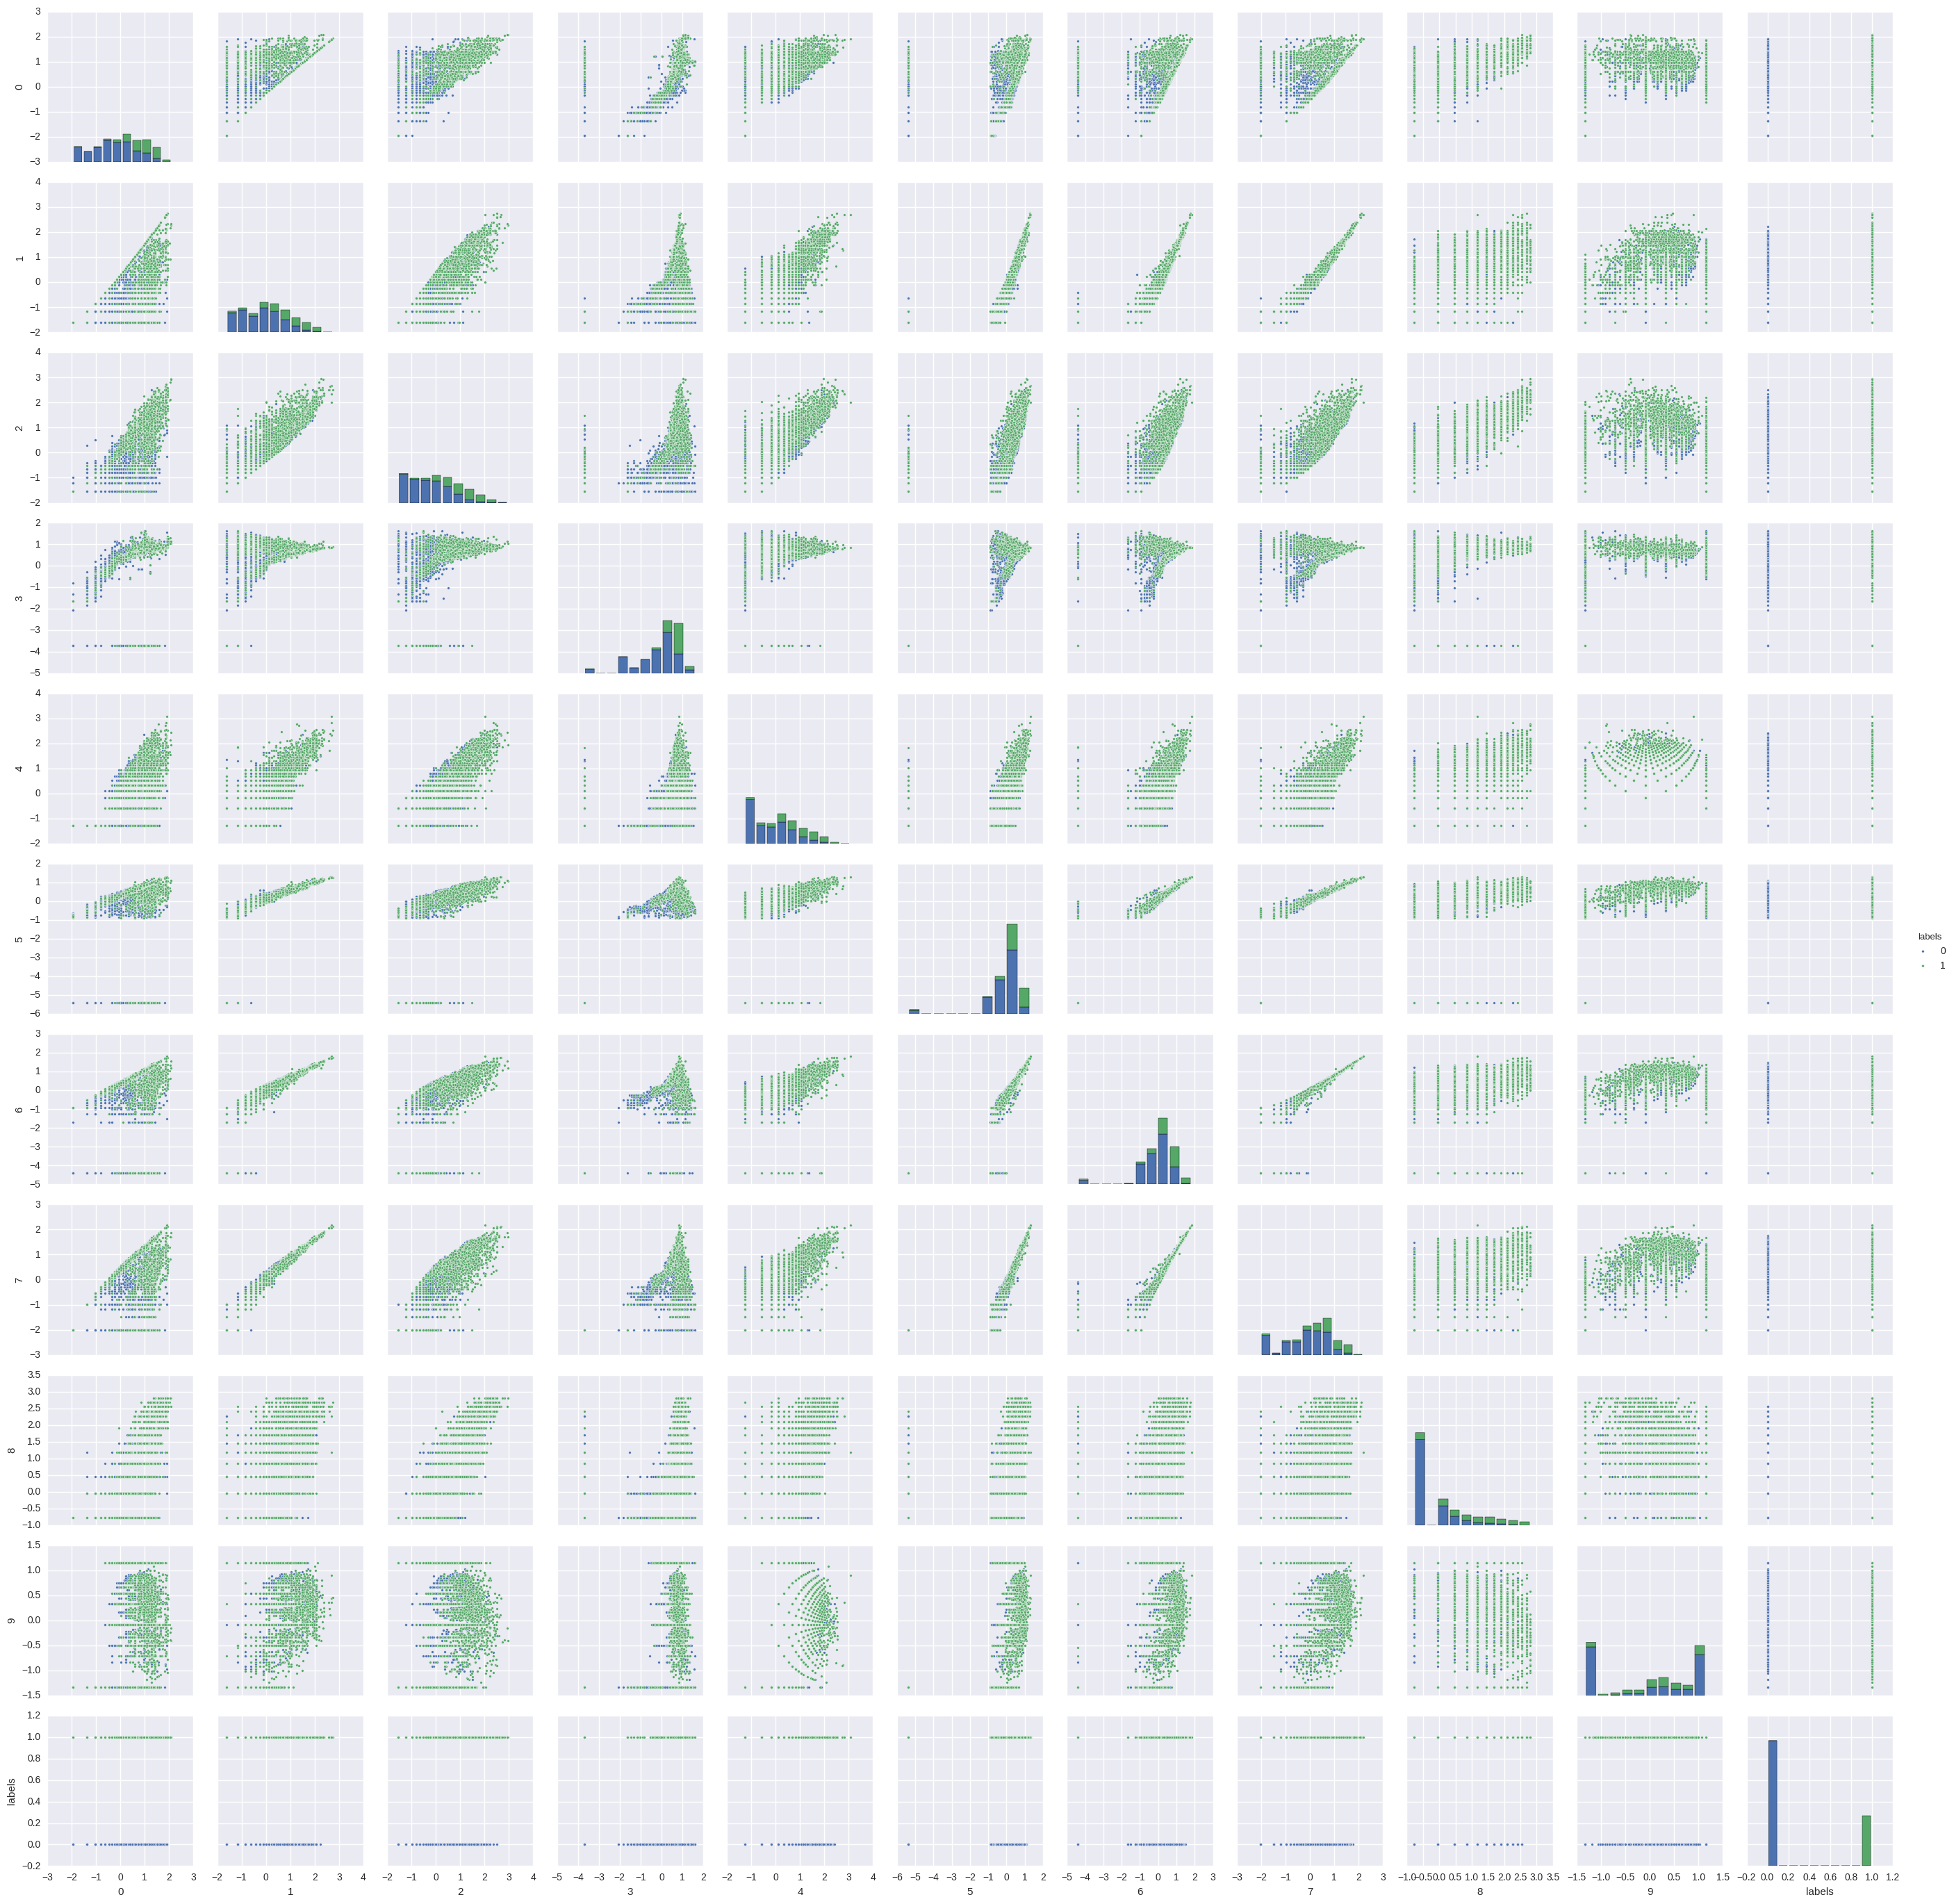

In [525]:
pair = pd.DataFrame(x_log[:25000])
pair['labels'] = y_train[:25000]
seaborn.pairplot(pair[:7000], hue = 'labels',plot_kws={"s": 7})


## t-SNE

In [578]:
tsne = mani.TSNE()
#tsne.fit(x_train_scaled)
%time tsne_data = tsne.fit_transform(x_log[:10000])

CPU times: user 8min 16s, sys: 48.1 s, total: 9min 4s
Wall time: 9min 3s


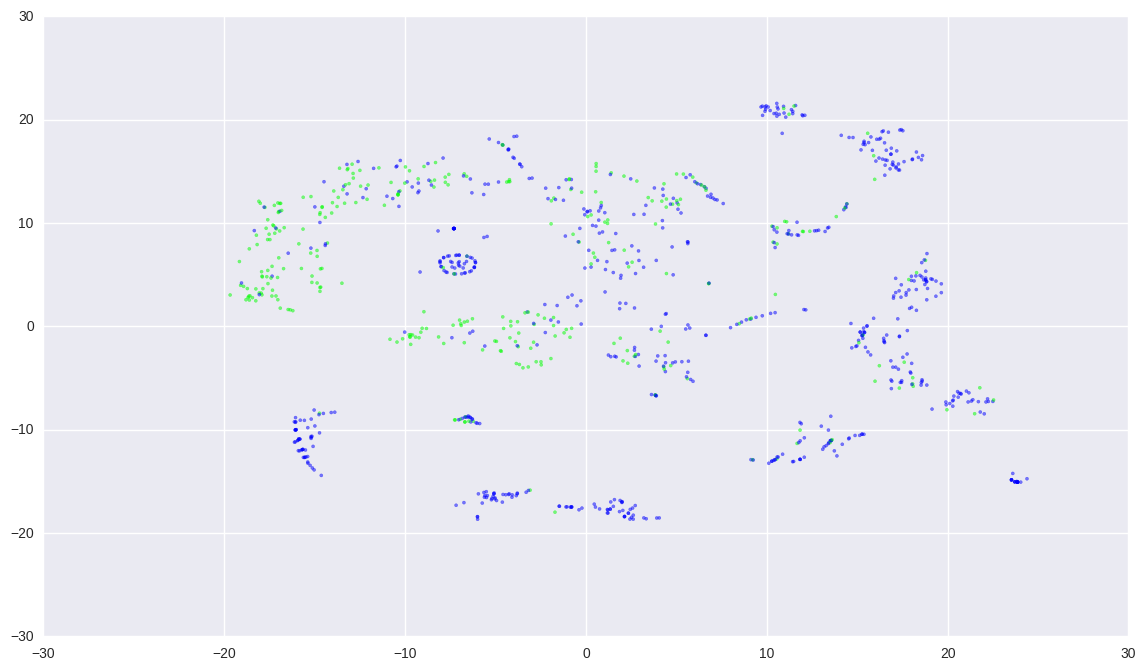

In [573]:
#print tsne_data[:100]
a = np.asarray(tsne_data).T
plt.figure(figsize=(14,8))
y = np.asarray(y_train)[:10000]

plt.scatter(a[0],a[1],marker='o',c=y,cmap='brg',s=5,edgecolor='face',alpha=0.5)


### XGBoost
##### not working

In [330]:
import xgboost as xgb

In [566]:
y = np.asarray(y_train)
X = np.asarray(x_log).astype(float)
x_train_, x_test_, y_train_, y_test_ = sk.cross_validation.train_test_split(X,y,test_size=0.2)


param = {'max_depth':3, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 20

train = xgb.DMatrix(x_train_,label=y_train_)
bst = xgb.train(param,train , num_round)
# make prediction
preds = bst.predict(xgb.DMatrix(x_test_))
print sk.metrics.log_loss(y_test_,preds)
print preds

0.380565666065
[ 0.25195616  0.02156971  0.05184219 ...,  0.41283679  0.38940316
  0.39232543]


## Choosing classifier using train test split 

In [7]:
import sklearn.ensemble as ens
import sklearn.cross_validation as cv
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Universal testing func

In [738]:
#Setting variables

def test_alg(algo,X=data.X,y=data.y,test_size = 0.2,desc = True):  
        # X=X will use your global X defined above. 
        
    x_train_, x_test_, y_train_, y_test_ = sk.cross_validation.train_test_split(X,y,test_size=test_size,)
    #fitting the model
    algo.fit(x_train_,y_train_)
    y_pred = algo.predict_proba(x_test_)
    #return log loss
    metrics = sk.metrics.log_loss(y_test_,y_pred)
    s= "result: "+str(metrics)
    if desc:
        s = s+" \n\nAlgorithm info:\n"+str(algo)
    print s
    return  metrics

Already scaled
True
plot for 


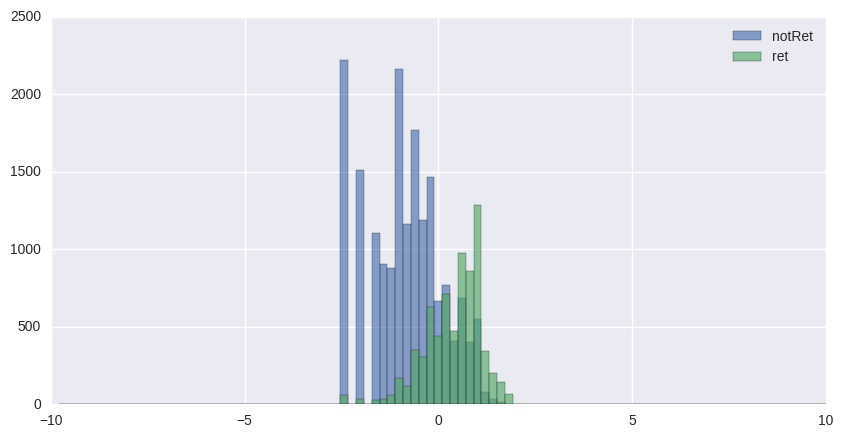

In [737]:
data.scale()
loged = data.log_x()
print loged.loged
plt.figure(figsize=(10,5))
loged.plot_hist()

#### Random Forest

In [743]:
Forest = ens.RandomForestClassifier(n_estimators=200,max_depth=4)


test_alg(Forest,X=x_train)

result: 0.389234448361 

Algorithm info:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


0.38923444836102972

In [753]:
Forest.fit(data.X,data.y)
y_pred = Forest.predict(data.X)
data_pred = Data(data.X,y_pred)


ValueError: num must be 1 <= num <= 4, not 5

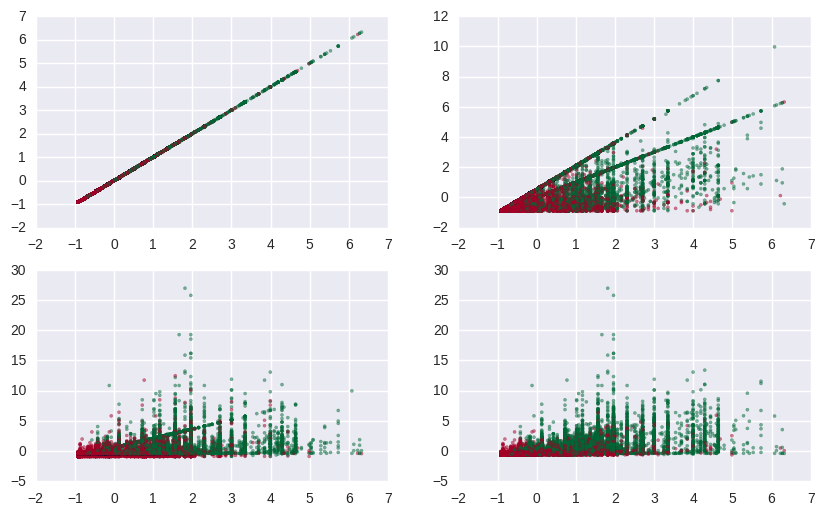

In [771]:
plt.figure(figsize=(10,6))
k=0
for i in range(12):
    for j in range(i, 12):
        fich_number1 = i
        fich_number2 = j
        k=k+1
        plt.subplot(220+k)
        data.plot_scatter(fich_number1,fich_number2)
        plt.subplot(221+k)
        data_pred.plot_scatter(fich_number1,fich_number2)

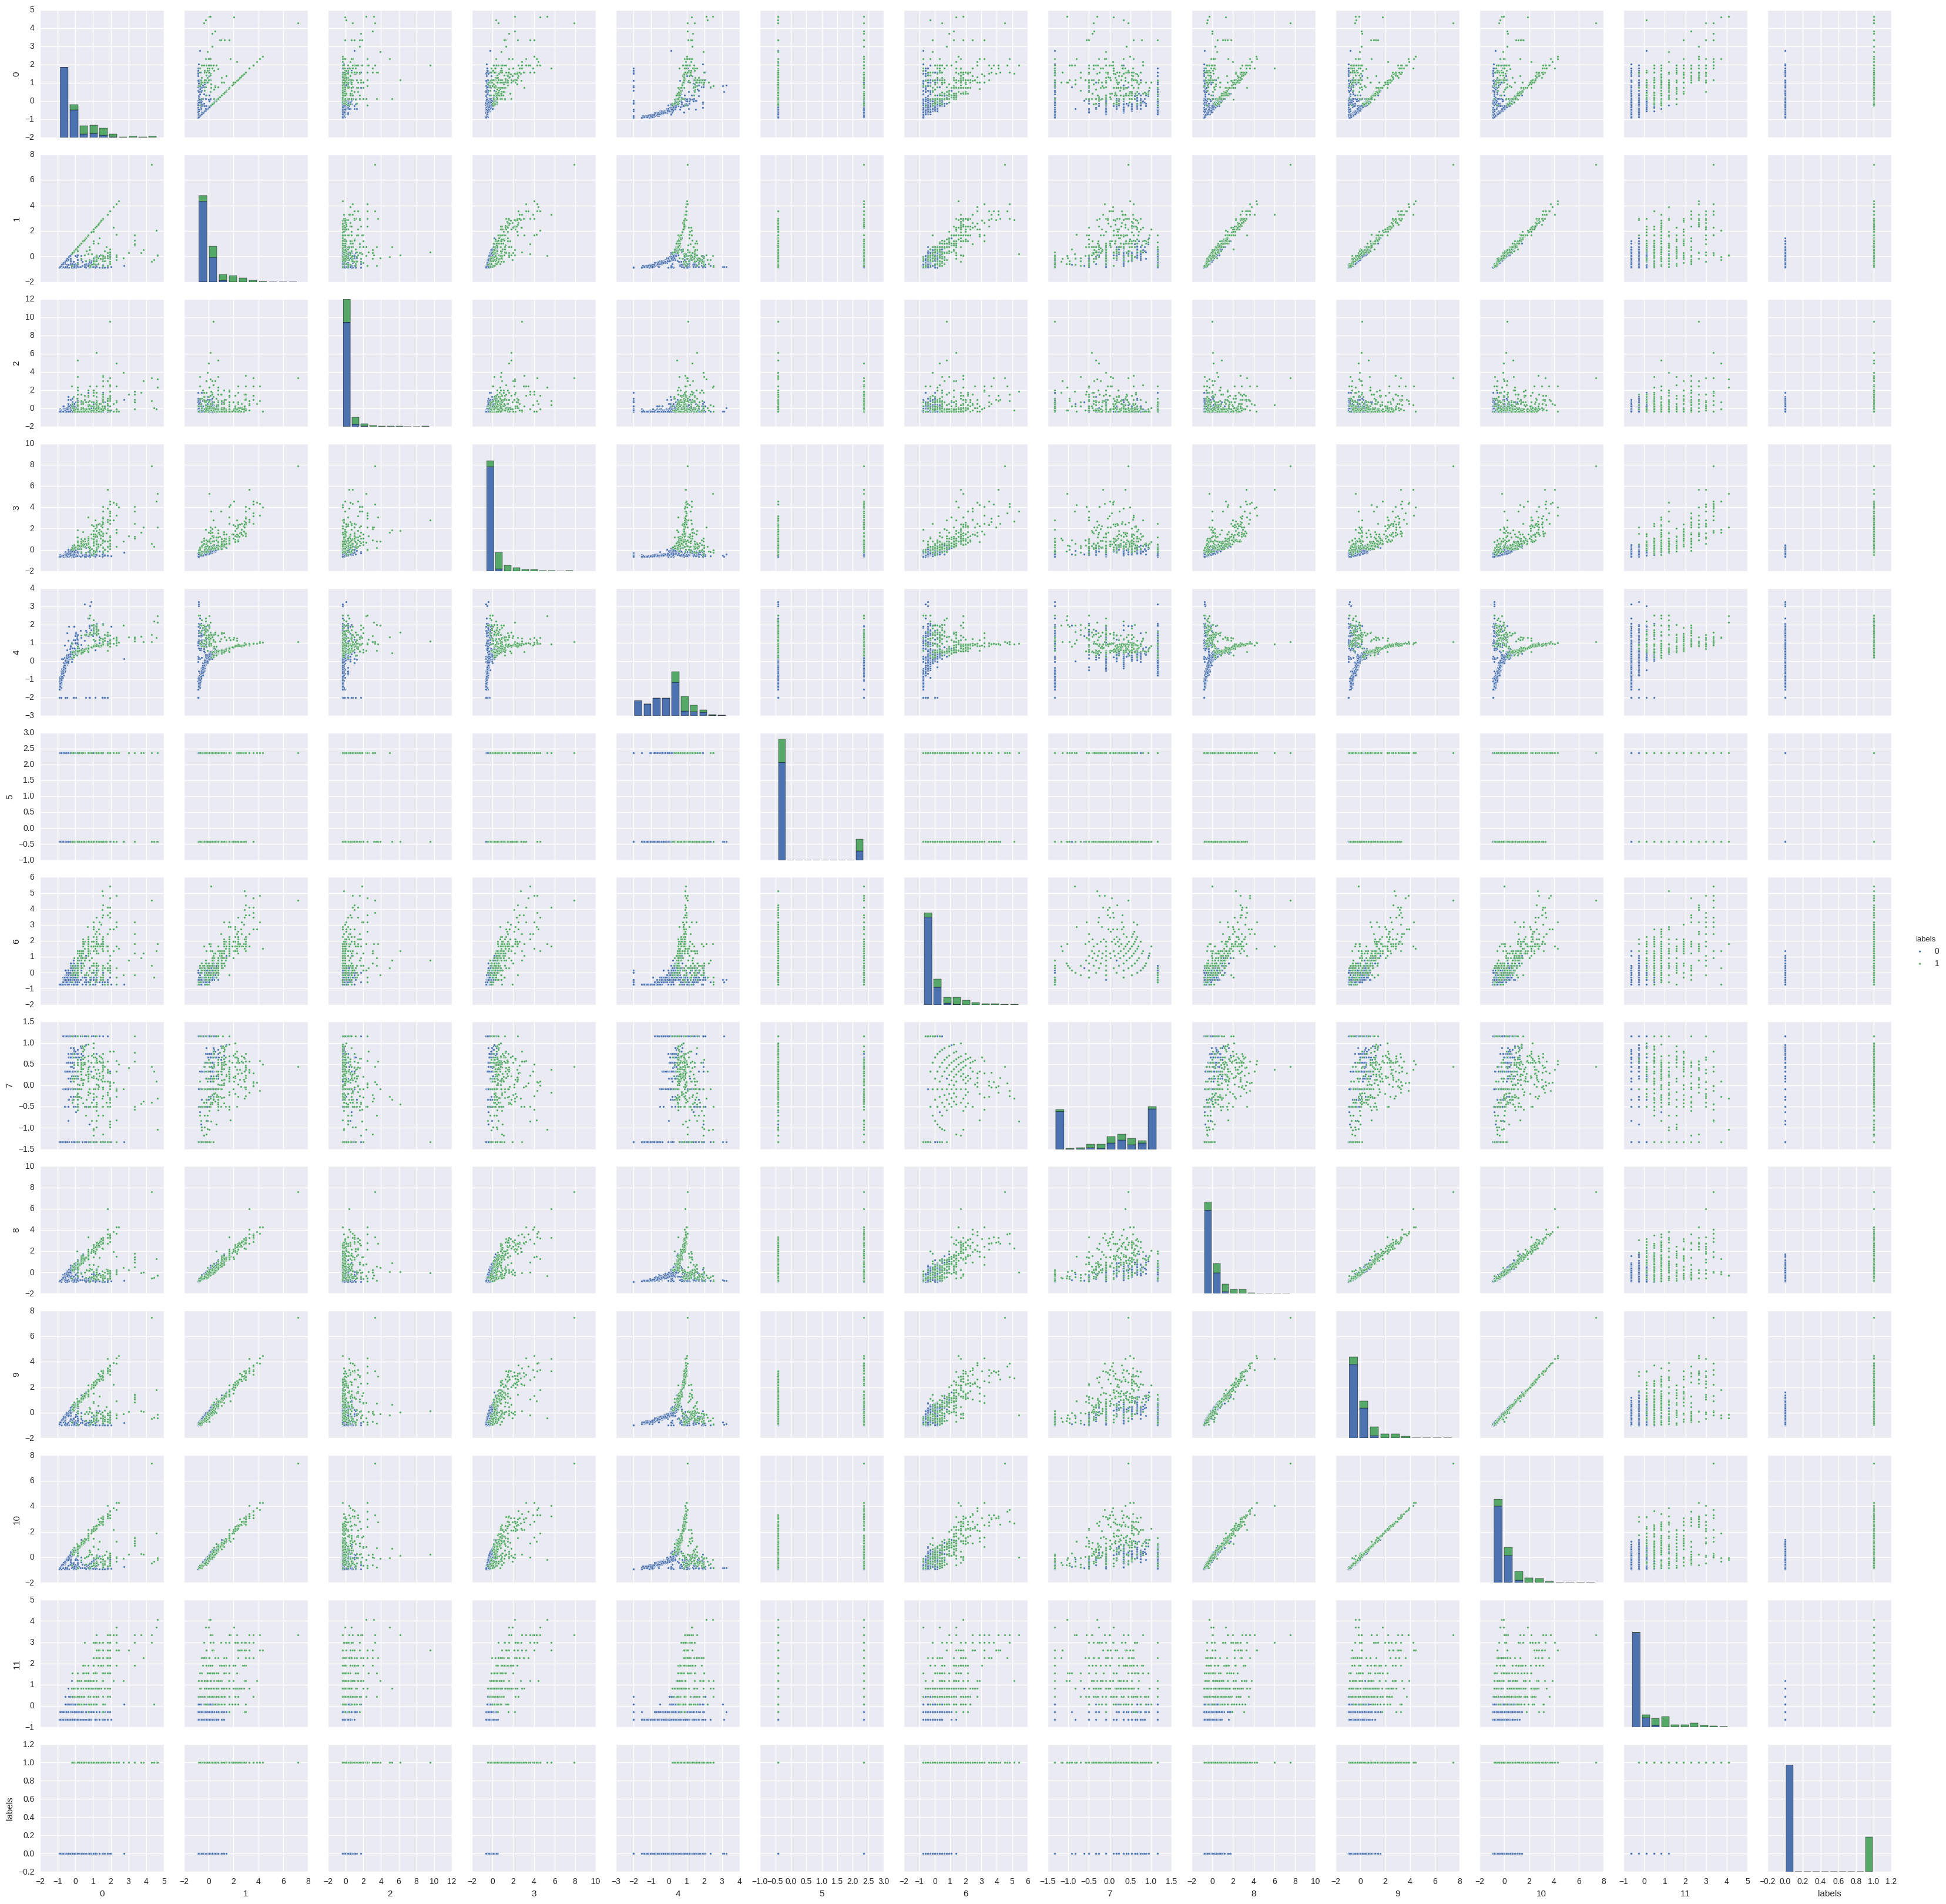

In [766]:
data_pred.pairplot(1000)

#### Expectation Maximization

In [570]:
EM = sk.gaussian_process.GaussianProcessClassifier()

test_alg(EM,X=x_log[:10000],y=y[:10000])

result: 0.390936858274 

Algorithm info:
GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)


0.39093685827370006

#### Gradient Boosting


In [683]:
Booster  = sk.ensemble.GradientBoostingClassifier(max_depth=4,learning_rate=0.01,n_estimators=300)

test_alg(Booster)

result: 0.386696872619 

Algorithm info:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


0.3866968726192257

#### SVM

In [81]:
SVM  = sk.svm.SVC(probability=True)
test_alg(SVM)

0.4121487675814034

#### MLP 

In [10]:
MLP = MLPClassifier(hidden_layer_sizes=(25,1))

test_alg(MLP,test_size=0.2)

/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:899: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result: 0.376259690634 

Algorithm info:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


0.37625969063403236

In [ ]:

parameters = [(10,1),(10,5),
                              (12,1),(12,5),
                              (15,1),
                              (20,1),(30,1),(50,1),(75,1),(100,1),(200,1),(500,1),(1000,1)]
for i in parameters:
    print i
    test_alg(MLPClassifier(hidden_layer_sizes=i),desc=False)
#gridsearch = sk.model_selection.GridSearchCV(MLP,parameters)

#x_train_, x_test_, y_train_, y_test_ = sk.cross_validation.train_test_split(X,y,test_size=0.3)

#%time gridsearch.fit(x_train_,y_train_)


(10, 1)
result: 0.37905113203
(10, 5)
result: 0.384297832053
(12, 1)
result: 0.389286538604
(12, 5)
result: 0.397383241477
(15, 1)
result: 0.408752948982
(20, 1)
result: 0.392174899366
(30, 1)
result: 0.43001414135
(50, 1)
result: 0.749143125566
(75, 1)


In [540]:
from sklearn.model_selection import cross_val_score
X,y = sk.utils.shuffle(X,y)
scores = cross_val_score(bst, x_log, np.asarray(y).reshape(25289,), cv=10,scoring='neg_log_loss')
print scores

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x7fd21463f950> was passed

In [15]:
print np.std(scores),scores.mean()

0.0112962050018 -0.384454096504


### Lasagne

In [16]:
import theano
import theano.tensor as T
import lasagne
x_train_,x_test_,y_train_,y_test_ = sk.model_selection.train_test_split(X,y,test_size=0.2)

input_var = T.matrix('inputs')
target_var = T.ivector('targets')

/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [315]:
X = np.asarray(pd.read_csv('x_train.csv',sep=';'))
y = np.asarray(pd.read_csv('y_train.csv',sep=';',names=['value'])).reshape(25289,)

scaler = sk.preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [316]:
X,y=sk.utils.shuffle(X,y)

In [317]:
pd.DataFrame(X).describe()

0             1             2             3             4   \
count  2.528900e+04  2.528900e+04  2.528900e+04  2.528900e+04  2.528900e+04   
mean  -9.454610e-17  1.510209e-17  2.542770e-17 -1.489136e-17  7.684505e-17   
std    1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00   
min   -9.133637e-01 -8.787185e-01 -3.705914e-01 -6.461602e-01 -2.002443e+00   
25%   -7.150745e-01 -7.247733e-01 -3.705914e-01 -5.711457e-01 -7.406313e-01   
50%   -3.680686e-01 -3.399103e-01 -3.705914e-01 -3.711068e-01  1.840300e-01   
75%    4.250878e-01  2.758705e-01 -7.501825e-02  1.039853e-01  6.593793e-01   
max    6.324189e+00  9.974418e+00  2.696993e+01  1.340657e+01  4.006186e+00   

                 5             6             7             8             9   \
count  2.528900e+04  2.528900e+04  2.528900e+04  2.528900e+04  2.528900e+04   
mean   2.247753e-17  1.615572e-17 -7.361390e-17 -6.595749e-17 -7.326269e-17   
std    1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00   
min   -4.240925e-01 -7.392115e-01 -1.330177e+00 -8.445122e-01 -9.853780e-01   
25%   -4.240925e-01 -7.392115e-01 -1.330177e+00 -7.030901e-01 -7.203942e-01   
50%   -4.240925e-01 -4.375677e-01  2.094257e-01 -3.467531e-01 -2.941160e-01   
75%   -4.240925e-01  1.657198e-01  1.156873e+00  2.944777e-01  3.395409e-01   
max    2.357976e+00  1.147736e+01  1.156873e+00  8.331237e+00  1.020155e+01   

                 10            11  
count  2.528900e+04  2.528900e+04  
mean  -2.651646e-17 -9.391392e-17  
std    1.000020e+00  1.000020e+00  
min   -9.143458e-01 -6.238244e-01  
25%   -7.102849e-01 -6.238244e-01  
50%   -3.021630e-01 -6.238244e-01  
75%    3.440299e-01  9.942581e-02  
max    9.934893e+00  4.077302e+00

In [318]:
X_train=X[:15000]
y_train=y[:15000]

X_val = X[15000:20000]
y_val = y[15000:20000]

test = (X[20000:25000],y[20000:25000])

In [319]:
# For training, we want to sample examples at random in small batches
def batch_gen(X, y, N):
    while True:
        idx = np.random.choice(len(y), N)
        yield X[idx].astype('float32'), y[idx].astype('int32')

In [320]:
# A very simple network, a single layer with one neuron per target class.
# Using the softmax activation function gives us a probability distribution at the output.
l_in = lasagne.layers.InputLayer((None, 12))
l_hid1 = lasagne.layers.DenseLayer(l_in,num_units=2000,nonlinearity=lasagne.nonlinearities.rectify)
l_out = lasagne.layers.DenseLayer(
    l_hid1,
    num_units=2,
    nonlinearity=lasagne.nonlinearities.softmax)



In [321]:
# Symbolic variables for our input features and targets
X_sym = T.matrix()
y_sym = T.ivector()

# Theano expressions for the output distribution and predicted class
output = lasagne.layers.get_output(l_out, X_sym)
pred = output.argmax(-1)

# The loss function is cross-entropy averaged over a minibatch, we also compute accuracy as an evaluation metric
loss = T.mean(lasagne.objectives.categorical_crossentropy(output, y_sym))
acc = T.mean(T.eq(pred, y_sym))

# We retrieve all the trainable parameters in our network - a single weight matrix and bias vector
params = lasagne.layers.get_all_params(l_out)
print(params)

# Compute the gradient of the loss function with respect to the parameters.
# The stochastic gradient descent algorithm produces updates for each param
grad = T.grad(loss, params)
updates = lasagne.updates.sgd(grad, params, learning_rate=0.05)
print(updates)

[W, b, W, b]
OrderedDict([(W, Elemwise{sub,no_inplace}.0), (b, Elemwise{sub,no_inplace}.0), (W, Elemwise{sub,no_inplace}.0), (b, Elemwise{sub,no_inplace}.0)])


In [322]:
# We define a training function that will compute the loss and accuracy, and take a single optimization step
f_train = theano.function([X_sym, y_sym], [loss, acc], updates=updates)

# The validation function is similar, but does not update the parameters
f_val = theano.function([X_sym, y_sym], [loss, acc])

# The prediction function doesn't require targets, and outputs only the predicted class values
f_predict = theano.function([X_sym], pred)

In [323]:
# We'll choose a batch size, and calculate the number of batches in an "epoch"
# (approximately one pass through the data).
BATCH_SIZE = 64
N_BATCHES = len(X_train) // BATCH_SIZE
N_VAL_BATCHES = len(X_val) // BATCH_SIZE

# Minibatch generators for the training and validation sets
train_batches = batch_gen(X_train, y_train, BATCH_SIZE)
val_batches = batch_gen(X_val, y_val, BATCH_SIZE)

In [324]:
# For each epoch, we call the training function N_BATCHES times,
# accumulating an estimate of the training loss and accuracy.
# Then we do the same thing for the validation set.
# Plotting the ratio of val to train loss can help recognize overfitting.
for epoch in range(10):
    train_loss = 0
    train_acc = 0
    for _ in range(N_BATCHES):
        X, y = next(train_batches)
        loss, acc = f_train(X, y)
        train_loss += loss
        train_acc += acc
    train_loss /= N_BATCHES
    train_acc /= N_BATCHES

    val_loss = 0
    val_acc = 0
    for _ in range(N_VAL_BATCHES):
        X, y = next(val_batches)
        loss, acc = f_val(X, y)
        val_loss += loss
        val_acc += acc
    val_loss /= N_VAL_BATCHES
    val_acc /= N_VAL_BATCHES
    
    print('Epoch {}, Train (val) loss {:.03f} ({:.03f}) ratio {:.03f}'.format(
            epoch, train_loss, val_loss, val_loss/train_loss))
    print('Train (val) accuracy {:.03f} ({:.03f})'.format(train_acc, val_acc))

Epoch 0, Train (val) loss 0.407 (0.400) ratio 0.983
Train (val) accuracy 0.820 (0.829)
Epoch 1, Train (val) loss 0.400 (0.378) ratio 0.946
Train (val) accuracy 0.822 (0.833)
Epoch 2, Train (val) loss 0.395 (0.387) ratio 0.978
Train (val) accuracy 0.825 (0.834)
Epoch 3, Train (val) loss 0.385 (0.371) ratio 0.963
Train (val) accuracy 0.832 (0.839)
Epoch 4, Train (val) loss 0.386 (0.369) ratio 0.956
Train (val) accuracy 0.828 (0.843)
Epoch 5, Train (val) loss 0.380 (0.370) ratio 0.975
Train (val) accuracy 0.831 (0.839)
Epoch 6, Train (val) loss 0.387 (0.374) ratio 0.967
Train (val) accuracy 0.829 (0.829)
Epoch 7, Train (val) loss 0.383 (0.381) ratio 0.995
Train (val) accuracy 0.831 (0.836)
Epoch 8, Train (val) loss 0.389 (0.369) ratio 0.950
Train (val) accuracy 0.824 (0.840)
Epoch 9, Train (val) loss 0.386 (0.386) ratio 1.000
Train (val) accuracy 0.830 (0.834)


In [325]:
res = lasagne.layers.get_output(l_out,test[0]).eval()
print res
c = pd.DataFrame()
c['pred']=(res[:,1])
c['true']=  test[1]
c.describe()

[[ 0.0570464   0.9429536 ]
 [ 0.91962169  0.08037831]
 [ 0.51564184  0.48435816]
 ..., 
 [ 0.73841999  0.26158001]
 [ 0.81115884  0.18884116]
 [ 0.93305319  0.06694681]]


pred        true
count  5000.000000  5000.00000
mean      0.302748     0.28820
std       0.294984     0.45297
min       0.022582     0.00000
25%       0.060422     0.00000
50%       0.158290     0.00000
75%       0.536014     1.00000
max       0.999795     1.00000

In [326]:
sk.metrics.log_loss(test[1],res[:,1])

0.38524352831137387

In [327]:
#print (test[0]),(x_train)

In [281]:
res = lasagne.layers.get_output(l_out,np.asarray(x_train)).eval()
res


array([[ 0.61722551,  0.38277449],
       [ 0.41208867,  0.58791133],
       [ 0.93340762,  0.06659238],
       ..., 
       [ 0.9315334 ,  0.0684666 ],
       [ 0.75454789,  0.24545211],
       [ 0.97041861,  0.02958139]])

In [282]:
sk.metrics.log_loss(y_train,res[:,1])

0.3822244580297699

# Predicting on test data

In [283]:
x_test = pd.read_csv('x_test.csv',';')
x_train = np.asarray(pd.read_csv('x_train.csv',';'))
y_train = np.asarray(pd.read_csv('y_train.csv',';',names=['val']))

# Scaling test data with the SAME scaler used for training

#scaler = pr.StandardScaler()
x_test= scaler.transform(x_test)



In [288]:
#lasagne 
y_res = lasagne.layers.get_output(l_out,np.asarray(x_test)).eval()

In [342]:
y_res = MLP.predict_proba(x_test_scaled)

y_stay = pd.DataFrame(y_res[:,1])
y_stay.describe()

0
count  25289.000000
mean       0.293498
std        0.292606
min        0.043034
25%        0.052212
50%        0.136885
75%        0.534391
max        0.999709

In [343]:
y_res[:,1]

array([ 0.11054314,  0.04947908,  0.59569481, ...,  0.06344307,
        0.20113836,  0.04303428])

In [344]:
y_stay.to_csv('results_Lasagne.csv',index=False,header=False)